n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      igd      |       gd      |       hv     
     1 |       30 |     11 |  0.000000E+00 |  0.0107554979 |  0.0883390082 |  0.0079593409 |  0.7619254355
     2 |       60 |     23 |  0.000000E+00 |  0.000000E+00 |  0.0781259325 |  0.0097484902 |  0.7728490897
     3 |       90 |     30 |  0.000000E+00 |  0.000000E+00 |  0.0428701128 |  0.0104069850 |  0.7822448231
     4 |      120 |     30 |  0.000000E+00 |  0.000000E+00 |  0.0362202921 |  0.0094851432 |  0.7869275467
     5 |      150 |     30 |  0.000000E+00 |  0.000000E+00 |  0.0341723499 |  0.0101572671 |  0.7881365745
     6 |      180 |     30 |  0.000000E+00 |  0.000000E+00 |  0.0300638311 |  0.0112997359 |  0.7888763227
     7 |      210 |     30 |  0.000000E+00 |  0.000000E+00 |  0.0300874563 |  0.0107565288 |  0.7881696119
     8 |      240 |     30 |  0.000000E+00 |  0.000000E+00 |  0.0281667645 |  0.0089272258 |  0.7916961984
     9 |      270 |     30 |  0.00000

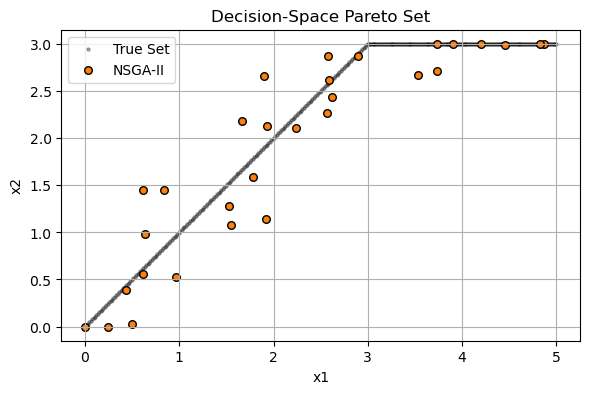

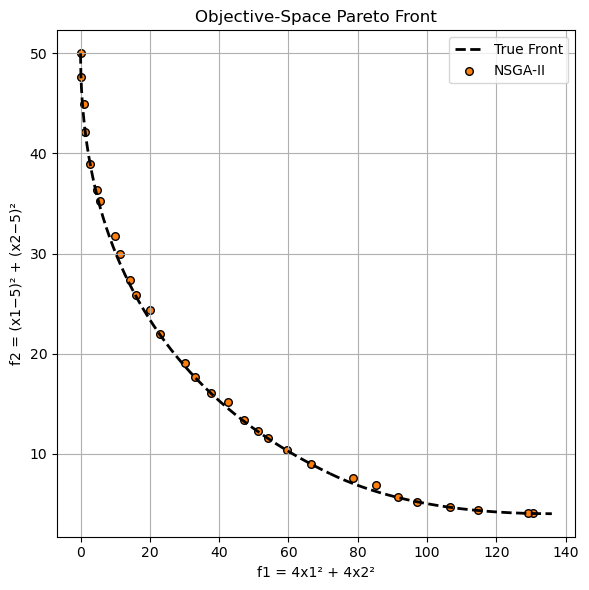

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Import pymoo components
from pymoo.problems.multi import BNH
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.operators.sampling.lhs import LHS

# 2) Instantiate the BNH problem
problem = BNH()

# 3) Set up NSGA‑II
algorithm = NSGA2(
    pop_size=30,
    sampling= LHS(),
    eliminate_duplicates=True
)

# 4) Run optimization for 200 generations
res = minimize(
    problem,
    algorithm,
    termination=('n_gen', 30),
    seed=42,
    save_history=True,
    verbose=True
    )

# 5) Extract results
X_opt = res.X        # decision vectors, shape (n_nds, 2)
F_opt = res.F        # objective values, shape (n_nds, 2)

# 6) Plot Decision‑Space Pareto Set
plt.figure(figsize=(6,6))
# True analytical set for reference
t1 = np.linspace(0,3,200)
seg1 = np.vstack([t1, t1]).T
t2 = np.linspace(3,5,200)
seg2 = np.vstack([t2, np.full_like(t2,3.0)]).T
X_true = np.vstack([seg1,seg2])
plt.scatter(X_true[:,0], X_true[:,1], c='k', s=5, alpha=0.3, label='True Set')

plt.scatter(X_opt[:,0], X_opt[:,1], c='C1', s=30, edgecolors='k', label='NSGA-II')
plt.xlabel('x1'); plt.ylabel('x2')
plt.title('Decision‐Space Pareto Set')
plt.legend(); plt.grid(True)
plt.gca().set_aspect('equal', 'box')
plt.tight_layout()
plt.show()




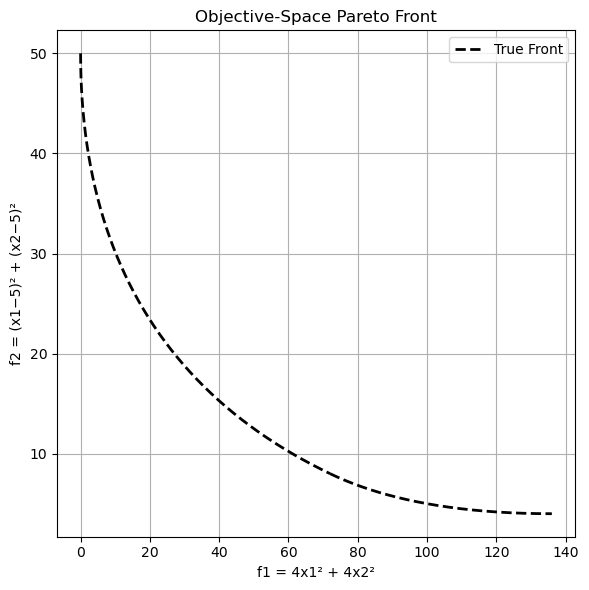

In [13]:
# 7) Plot Objective‑Space Pareto Front
plt.figure(figsize=(6,6))
# True analytical front
f1_A = 8*t1**2
f2_A = 2*(t1-5)**2
f1_B = 4*t2**2 + 4*3**2
f2_B = (t2-5)**2 + (3-5)**2
plt.plot(f1_A, f2_A, 'k--', lw=2, label='True Front')
plt.plot(f1_B, f2_B, 'k--', lw=2)

# plt.scatter(F_opt[:,0], F_opt[:,1], c='C1', s=30, edgecolors='k', label='NSGA-II')
plt.xlabel('f1 = 4x1² + 4x2²')
plt.ylabel('f2 = (x1−5)² + (x2−5)²')
plt.title('Objective‐Space Pareto Front')
plt.legend(); plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Decision‐Space Pareto Set')

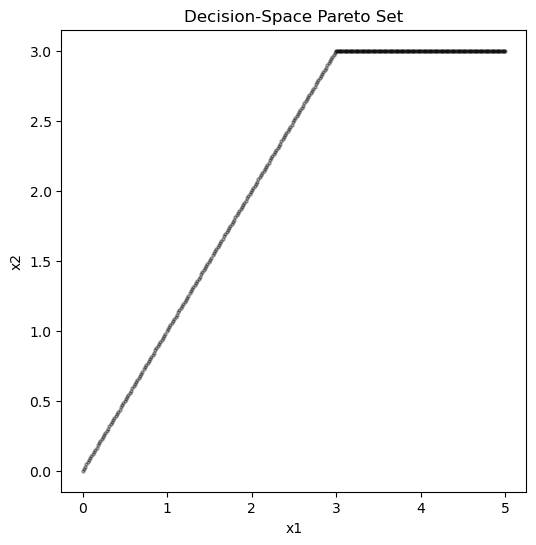

In [18]:
# 6) Plot Decision‑Space Pareto Set
plt.figure(figsize=(6,6))
# True analytical set for reference
t1 = np.linspace(0,3,200)
seg1 = np.vstack([t1, t1]).T
t2 = np.linspace(3,5,200)
seg2 = np.vstack([t2, np.full_like(t2,3.0)]).T
X_true = np.vstack([seg1,seg2])
plt.scatter(X_true[:,0], X_true[:,1], c='k', s=5, alpha=0.3, label='True Set')
plt.xlabel('x1'); plt.ylabel('x2')
plt.title('Decision‐Space Pareto Set')

In [11]:
import os
import datetime
import pickle
import numpy as np

notebook_name = "bnh_nsga" 
now = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

base_dir = os.path.join("results", notebook_name)
save_dir = os.path.join(base_dir, f"run_{now}")
os.makedirs(save_dir, exist_ok=True)
print(f"Results will be saved in: {save_dir}")

with open(os.path.join(save_dir, "nsga.pkl"), "wb") as f:
    pickle.dump(res, f)

Results will be saved in: results/bnh_nsga/run_2025-04-20_15-47-55
